In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 基礎統計(二)之練習三：

觀察到20筆資料( 9, 8, 7, 16, 9, 2, 7, 5, 13, 6, 10, 9, 8, 9, 11, 5, 7, 11, 7, 7 )，<br>
假設是由二項分布產生，並已知分布參數的 n=20，
<br>– 依據估計的模型產生1000個樣本，計算估計值的平均與變異
<br>– 依據同樣的1000個樣本，計算估計值的均方誤差
<br>– 檢查均方誤差是否為偏誤的平方＋變異數

In [2]:
def mse(theta, theta_hat):
    ans=np.square(theta - theta_hat).mean()
    return round(ans, 15)

In [3]:
def bias_squ_add_var(theta, theta_hat):
    ans=np.square(np.mean(theta_hat)-theta)+np.var(theta_hat)
    return round(ans, 15)

In [4]:
sample_size=20    #為避免與參數 n 混淆，改其命名
p=0.415           #由先前練習估計得到參數的估計 
P=[]

for i in np.repeat(sample_size, 1000):
    sample=np.random.binomial(20, p, size=i) 
    # 先前版本誤為 np.random.binomial(n, p, size=1000)
    p_i=np.mean(sample)/n     #先前版本誤設為  p_i=1/np.mean(sample)
    P.append(p_i)
    
P=np.array(P)

MSE_p=mse(p, P)

t1=bias_squ_add_var(p, P)

print('p估計的均方誤差:',MSE_p)
print('p估計的偏誤的平方＋變異數',t1)

p估計的均方誤差: 0.00062888125
p估計的偏誤的平方＋變異數 0.00062888125


In [5]:
MSE_p==t1

True

# 基礎統計(三)之練習三 (B)：

### 某國小希望了解促進閱讀活動的成效，隨機要求三個班級參加。活動過後，由三個班級中抽樣15名學生，並由其他班級也抽樣15名學生作為對照組，訪問其每週閱讀小時數。

$\bullet$ 參與組 12,13,14,11,14,13,15,17,13,16,14,13,12,15,14<br>
$\bullet$ 對照組 13,13,17,8,8,18,10,7,11,8,12,11,13,10,14<br>
$\bullet$ 在顯著水準 5% 之下，回答閱讀活動是否明顯有成效？<br>
（比較參與組與對照組平均之差異）

$\mu_1$=有參加閱讀活動的班級的平均閱讀時數，$\mu_2$=沒有參加閱讀活動的班級的平均閱讀時數<br><br>
$H_o$：$\mu_1=\mu_2$<br>
$H_o$：$\mu_1 > \mu_2$

In [6]:
sample1=[12,13,14,11,14,13,15,17,13,16,14,13,12,15,14]
sample2=[13,13,17,8,8,18,10,7,11,8,12,11,13,10,14]
mean1=np.mean(sample1)
mean2=np.mean(sample2)
mean_null=np.mean([sample1[:],sample2[:]])  #虛無假設下應視為有相同平均

s1=np.var(sample1, ddof=1)
s2=np.var(sample2, ddof=1)
n1=n2=15

s=(s1/n1)+(s2/n2)

T=(mean1-mean2)/np.sqrt(s)

print('檢定統計量=', T)

檢定統計量= 2.3588627718971553


In [7]:
Ti=[]


for i in range(1000):
    sample1i=np.random.normal(loc=mean_null, scale=s1, size=n1) #此處平均參數原誤為 mean1 
    sample2i=np.random.normal(loc=mean_null, scale=s2, size=n2) #此處平均參數原誤為 mean2
    mean1i=np.mean(sample1i)
    mean2i=np.mean(sample2i)
    s1i=np.var(sample1i, ddof=1)
    s2i=np.var(sample2i, ddof=1)
    s_i=(s1i/n1)+(s2i/n2)
    ti=(mean1i-mean2i)/np.sqrt(s_i)
    Ti.append(ti)
    
Ti=np.array(Ti)

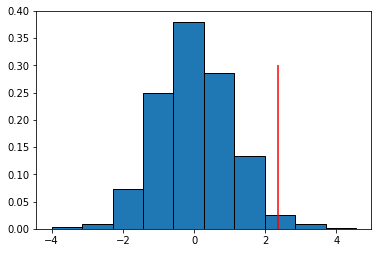

In [8]:
plt.hist(Ti, density=1, edgecolor='black')
plt.vlines(T, 0, 0.3, colors = "r")
plt.show()

#### $\bullet$ p值法：

In [9]:
print('p-value=',sum(Ti>T)/len(Ti))    

p-value= 0.018


$\text{p-value}<\alpha\Rightarrow\text{拒絕}H_0$，表示參加閱讀活動有顯著成效 （# 因先前平均參數有誤，結論也需更正）

#### $\bullet$ 拒絕域法：

In [10]:
Tis=np.sort(Ti,0)
print('落在拒絕域？', (T>Tis[949]) )

落在拒絕域？ True


In [ ]:
#test

$T> t_{1-\alpha}\Rightarrow\text{拒絕}H_0$，表示參加閱讀活動有顯著成效 （# 因先前平均參數有誤，結論也需更正）